# DALI machine optics and beam tracking 

## Najmeh Mirian 
27 Jan 2025

Here we have the optics and tarcking trnasport to MIR. 


In [1]:
import IPython
import numpy
import time
import scipy
import matplotlib
import ocelot
print('ocelot:', ocelot.__version__)
from __future__ import print_function
%matplotlib inline
from ocelot import *
#from Ocelot graphical modules
from ocelot.gui.accelerator import *
#from DALI_lattice import *

initializing ocelot...
ocelot: 24.03.0


In [29]:
from DALI_lattice import *
# this is the lattice of the accelerator section injector to 1,5m after RF kicker 
#T0 is the transfer line from SRF gun to linac section
#T1 is the transfer linac to seperation 

# MIR line                                                                                                                                                                                                                                                                                                                                                                                                                       

In [15]:
# initialization of Twiss object
tws0 = Twiss()
tws0.E       = 0.0055933376
tws0.emit_x  = 7.365138174912308e-07
tws0.emit_y  = 7.534879456221737e-07
tws0.beta_x  = 14.536983646893802
tws0.beta_y  = 14.193144329608034
tws0.alpha_x = 5.668202451983896
tws0.alpha_y = 5.532646004350875
tws0.gamma_x = 2.278912864000848
tws0.gamma_y = 2.2271436882043365

#Change RF parameters
phi=-5
LA1RC1.phi=phi; LA1RC2.phi=phi; LA2RC1.phi=phi; LA2RC1.phi=phi


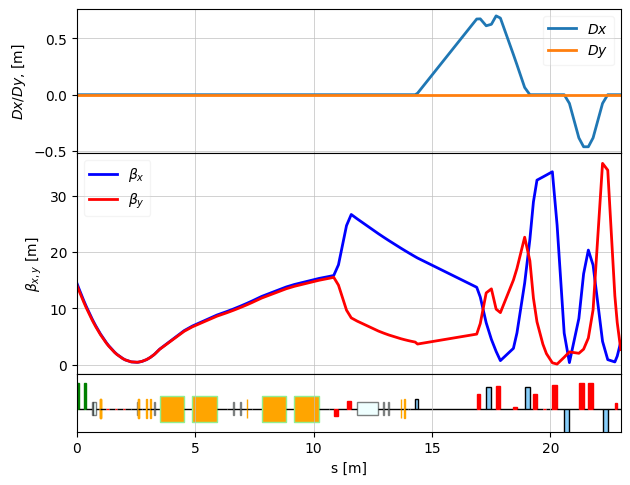

In [27]:
# Optics presntation 
lat_to_MIR2 = MagneticLattice(latcell_to_MIR)
twsSIR= twiss(lat_to_MIR2,tws0 )
plot_opt_func(lat_to_MIR2, twsSIR, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

In [17]:
#print(twsSIR[-1])

In [18]:
# loading particle file from Gun 
p_array_init = load_particle_array("injection_gun_beamm.npz")

In [19]:
method = {"global": SecondTM}
lat_DALI_MIR = MagneticLattice(latcell_to_MIR,method=method) 

In [20]:
# Initializing SpaceCharge
sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc3 = SpaceCharge()
sc3.nmesh_xyz = [63, 63, 63]
sc3.step = 3

z = 22.97899999999998 / 22.97899999999998. Applied:  SpaceChargee
 time exec: 33.2761070728302 sec


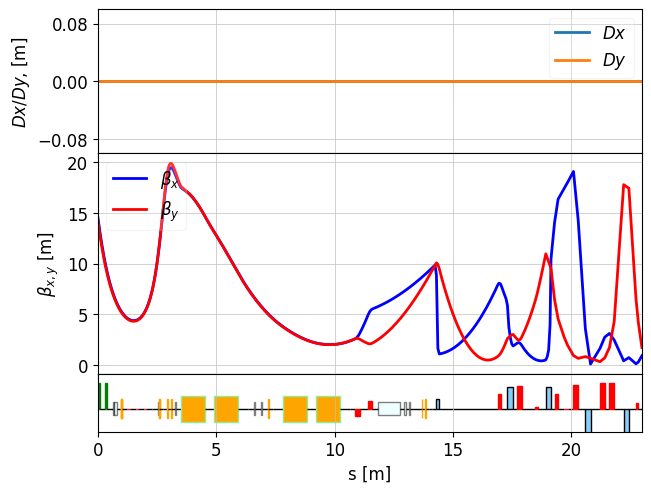

In [21]:
navi = Navigator(lat_DALI_MIR)
navi.unit_step = 0.02
# add physics processes from the first element to the last of the lattice
navi.add_physics_proc(sc1, START1I, enter_Linac1)
navi.add_physics_proc(sc3, enter_Linac1, lat_DALI_MIR.sequence[-1])

# definiing of unit step in [m]


p_array = deepcopy(p_array_init)
start = time.time()
tws_track, p_array = track(lat_DALI_MIR, p_array, navi)
print("\n time exec:", time.time() - start, "sec")

# optic presntation 
plot_opt_func(lat_DALI_MIR, tws_track, top_plot=["Dx", "Dy"],fig_name=0, legend=False)
plt.show()

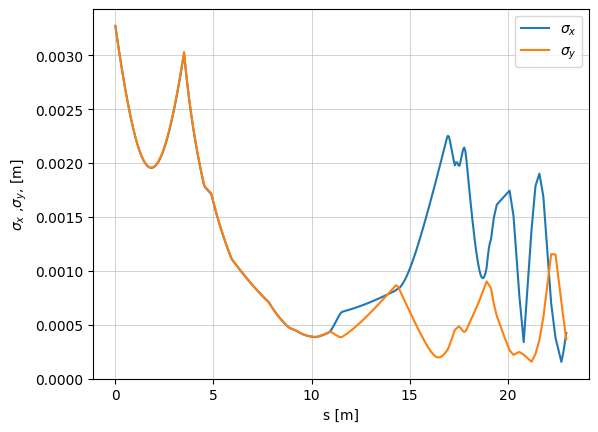

In [32]:
# bram size 
sigma_x = np.sqrt([tw.xx for tw in tws_track])
sigma_y = np.sqrt([tw.yy for tw in tws_track])
s = [tw.s for tw in tws_track]

plt.plot(s, sigma_x,label='$\sigma_x$')
plt.plot(s, sigma_y, label='$\sigma_y$')
plt.xlabel("s [m]")
plt.ylabel(r"$\sigma_x$ ,$\sigma_y$, [m]")
plt.legend()
plt.show()


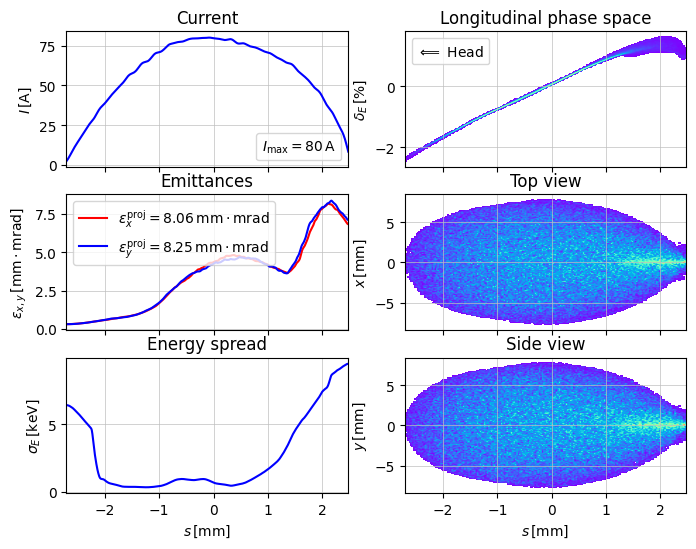

In [23]:
# intial beam (from SRF Gun )
show_e_beam(p_array_init, figsize=(8,6))
plt.show()

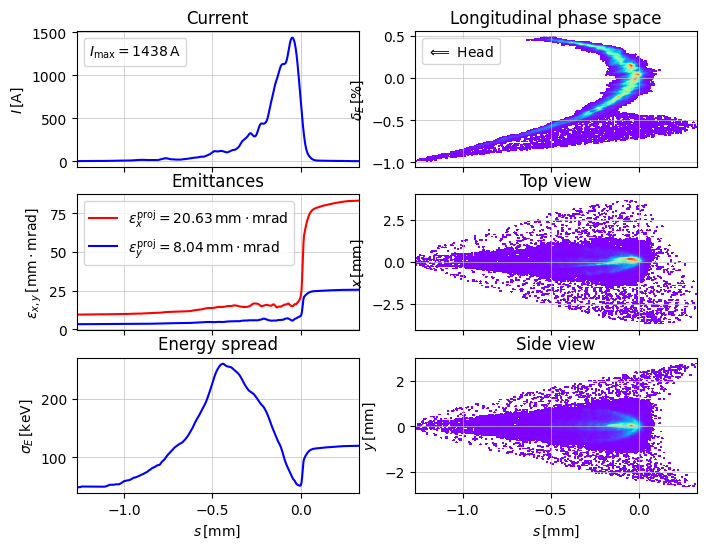

In [24]:
# after transport 
show_e_beam(p_array, figsize=(8,6))
plt.show()